# Analysing Transportation Data

## 0. Setting Up: Importing Data

We firstly import data for Edinburgh's cycle hire scheme from September 2018 - September 2019, storing these as pandas dataframes. We then concatenate these dataframes into one master dataframe called `Edinburgh_BikeRides`.

In [34]:
### EDINBURGH - 2019 DATA ###

Edinburgh_September = pd.read_csv("September.csv")
Edinburgh_September["started_at"] = pd.to_datetime(Edinburgh_September['started_at'])
Edinburgh_September["ended_at"] = pd.to_datetime(Edinburgh_September['ended_at'])

Edinburgh_August = pd.read_csv("August.csv")
Edinburgh_August["started_at"] = pd.to_datetime(Edinburgh_August['started_at'])
Edinburgh_August["ended_at"] = pd.to_datetime(Edinburgh_August['ended_at'])

Edinburgh_July = pd.read_csv("July.csv")
Edinburgh_July["started_at"] = pd.to_datetime(Edinburgh_July['started_at'])
Edinburgh_July["ended_at"] = pd.to_datetime(Edinburgh_July['ended_at'])

Edinburgh_June = pd.read_csv("June.csv")
Edinburgh_June["started_at"] = pd.to_datetime(Edinburgh_June['started_at'])
Edinburgh_June["ended_at"] = pd.to_datetime(Edinburgh_June['ended_at'])

Edinburgh_May = pd.read_csv("May.csv")
Edinburgh_May["started_at"] = pd.to_datetime(Edinburgh_May['started_at'])
Edinburgh_May["ended_at"] = pd.to_datetime(Edinburgh_May['ended_at'])

Edinburgh_April = pd.read_csv("April.csv")
Edinburgh_April["started_at"] = pd.to_datetime(Edinburgh_April['started_at'])
Edinburgh_April["ended_at"] = pd.to_datetime(Edinburgh_April['ended_at'])

Edinburgh_March = pd.read_csv("March.csv")
Edinburgh_March["started_at"] = pd.to_datetime(Edinburgh_March['started_at'])
Edinburgh_March["ended_at"] = pd.to_datetime(Edinburgh_March['ended_at'])

Edinburgh_February = pd.read_csv("Feb.csv")
Edinburgh_February["started_at"] = pd.to_datetime(Edinburgh_February['started_at'])
Edinburgh_February["ended_at"] = pd.to_datetime(Edinburgh_February['ended_at'])

Edinburgh_January = pd.read_csv("January.csv")
Edinburgh_January["started_at"] = pd.to_datetime(Edinburgh_January['started_at'])
Edinburgh_January["ended_at"] = pd.to_datetime(Edinburgh_January['ended_at'])

Edinburgh_December_18 = pd.read_csv("December_18.csv")
Edinburgh_December_18["started_at"] = pd.to_datetime(Edinburgh_December_18['started_at'])
Edinburgh_December_18["ended_at"] = pd.to_datetime(Edinburgh_December_18['ended_at'])

Edinburgh_November_18 = pd.read_csv("November_18.csv")
Edinburgh_November_18["started_at"] = pd.to_datetime(Edinburgh_November_18['started_at'])
Edinburgh_November_18["ended_at"] = pd.to_datetime(Edinburgh_November_18['ended_at'])

Edinburgh_October_18 = pd.read_csv("October_18.csv")
Edinburgh_October_18["started_at"] = pd.to_datetime(Edinburgh_October_18['started_at'])
Edinburgh_October_18["ended_at"] = pd.to_datetime(Edinburgh_October_18['ended_at'])

Edinburgh_September_18 = pd.read_csv("September_18.csv")
Edinburgh_September_18["started_at"] = pd.to_datetime(Edinburgh_September_18['started_at'])
Edinburgh_September_18["ended_at"] = pd.to_datetime(Edinburgh_September_18['ended_at'])

# Join together in big dataset
Edinburgh_BikeRides = pd.concat([Edinburgh_September_18, Edinburgh_October_18, Edinburgh_November_18, Edinburgh_December_18, Edinburgh_January, Edinburgh_February, Edinburgh_March, Edinburgh_April, Edinburgh_May, Edinburgh_June, Edinburgh_July, Edinburgh_August, Edinburgh_September])

Note that for the majority of this project we will work with the September 2019 data only. The reason for this is because the scheme only started in September 2018 (at which time there was a relatively small number of users) and it is likely that conclusions will change as the city becomes more aware and familiar with the scheme. Additionally, we did not feel it was appropriate to use solely summer data, as the city demographics are expected to change substantially during this time - there will be less students and a far greater number of tourists, especially during the Fringe.

In addition to Edinburgh data, we will also be using data for London's cycle hire scheme in this project, for which we will use several pieces of data:

1. Bike rides per day since the scheme started (`London_all_data`), in order to analyse long-term trends ([from TfL](https://cycling.data.tfl.gov.uk/))
2. Trips during September 2018 ([from TfL](https://cycling.data.tfl.gov.uk/), as September 2019 is not yet available), in order to compare with the latest data we have for Edinburgh . We call this `London_September_18`. This data came in five separate .csv files correpsonding to separate weeks (29 August - 04 Sep, ... , 26 Sep - 02 Oct). We import these files before joining them and selecting the relevant dates. To download these files online, please follow the link given above and download the corresponding 2018 files ('125JourneyDataExtract29Aug2018-04Sep2018.csv', ..., ' 129JourneyDataExtract26Sep2018-02Oct2018.csv').
3. Station names and IDs, along with their longitude and latitude ([from Kaggle](https://www.kaggle.com/edenau/london-bike-sharing-system-data)). We call this `London_Stations`.

In [35]:
###### Bike rides per day since the scheme's initiation ######

London_all_data = pd.read_csv("tfl.csv")
London_all_data["Number of Bicycle Hires"] = London_all_data["Number of Bicycle Hires"].str.replace(",","").astype(float) # Changing data format to type suitable for numeric analysis



###### September 2018 data ######

# Load in individual weeks
London1 = pd.read_csv("London29Aug2018-04Sep2018.csv")
London2 = pd.read_csv("London05Sep2018-11Sep2018.csv")
London3 = pd.read_csv("London12Sep2018-18Sep2018.csv")
London4 = pd.read_csv("London19Sep2018-25Sep2018.csv")
London5 = pd.read_csv("London26Sep2018-02Oct2018.csv")

# Join into one data frame
London_September_18 = pd.concat([London1, London2, London3, London4, London5])

# Change date data to date-time format
London_September_18["End Date"] = pd.to_datetime(London_September_18["End Date"], format='%d/%m/%Y %H:%M')
London_September_18["Start Date"] = pd.to_datetime(London_September_18["Start Date"], format='%d/%m/%Y %H:%M')

# Take only journeys in September
London_September_18 = London_September_18[London_September_18["End Date"].dt.month == 9]



###### Station names and locations ######

London_Stations = pd.read_csv("stations.csv", usecols = ['Station ID', 'Longitude', 'Latitude'])

## 1. Analysing Morning and Evening Journeys: Edinburgh, September 2019
### 1.1 Total Number of Trips To or From a Station

By plotting circles proportional to the total number of trips taken *to or from* a station throughout September, we visualise how busy Edinburgh's stations are as destinations or starting points of cycling trips.

Firstly, we put station location data into a format more suitable for plotting (`[name, latitude, longitude]`), and make a unique list of these:

In [36]:
# Put station locations into the format of list(Name, Latitude, Longitude) for plotting
Edinburgh_September["starting_location"] = Edinburgh_September[['start_station_name','start_station_latitude','start_station_longitude']].values.tolist()
Edinburgh_September["ending_location"] = Edinburgh_September[['end_station_name', 'end_station_latitude','end_station_longitude']].values.tolist()

# Put these into a list and remove duplicates
Edinburgh_Stations = np.unique(Edinburgh_September[['starting_location', 'ending_location']].values)

We notice that there are stations with the same name but have been recorded as having slightly different longitudes/ latitudes. For example, Roseburn Street has two different locations:

In [37]:
print(Edinburgh_Stations[64:66,])

[list(['Roseburn Street', 55.94442555452843, -3.2344977165944333])
 list(['Roseburn Street', 55.94446626439511, -3.234541218248978])]


Where stations have the same names but different longitude/latitudes, the locations only differ by a very small amount. We therefore take the first longitude/latitude for each station name and reassign the discrepancies, so that bike journeys corresponding to the same station aren't marked as occurring at different locations when we come to plot these on a map:

In [38]:
# Take a unique list of station names
Station_names = np.unique(Edinburgh_September[['start_station_name', 'end_station_name']].values)

# Find unique longitude/latitudes for these stations
Edinburgh_Stations_Unique = np.zeros(len(Station_names), dtype=np.ndarray) # Vector to store unique longitude/latitudes in
for i in range(len(Station_names)): # Loop through the names of all stations
    for j in range(len(Edinburgh_Stations)): # Loop through list with duplicates
        if Edinburgh_Stations[j][0] == Station_names[i]:
            Edinburgh_Stations_Unique[i] = list(Edinburgh_Stations[j][1:3]) 
            break # Break so that the longitude/latitude is taken for the first row for that station name only

Next we add in a 'morning' indicator variable to our dataset (morning defined as 12am to 12pm), and then create two vectors that count activity at each station for these times. i.e. `count_morning[0]` records the number of journeys made **to and from** station `station_names[0]`:

In [39]:
# Add in 'morning' indicator
Edinburgh_September["morning"] = Edinburgh_September['started_at'].dt.hour < 12

# For each station record activity
count_morning = np.zeros(len(Station_names))
count_evening = np.zeros(len(Station_names))
for i in range(len(Edinburgh_Stations_Unique)):
    for j in range(Edinburgh_September.values.shape[0]):
        if Edinburgh_September['start_station_name'][j] == Station_names[i] and Edinburgh_September['morning'][j] == True:
            count_morning[i] += 1
        if Edinburgh_September['start_station_name'][j] == Station_names[i] and Edinburgh_September['morning'][j] == False:
            count_evening[i] += 1
        if Edinburgh_September['end_station_name'][j] == Station_names[i] and Edinburgh_September['morning'][j] == True:
            count_morning[i] += 1
        if Edinburgh_September['end_station_name'][j] == Station_names[i] and Edinburgh_September['morning'][j] == False:
            count_evening[i] += 1
            
# Change to int values
count_morning = list(map(int, count_morning)) 
count_evening = list(map(int, count_evening)) 

Finally, we plot the morning and afternoon/evening activity. Each station will have two circles, blue corresponding to the journeys made **to and from** that station in the **morning**, whilst the red circles correspond to the same information for **afternoon/evening**. The radius is proportional to the number of journeys. Note that when the user clicks on a location, the counts are displayed:

In [40]:
# Initialise map
morning_evening_activity = folium.Map(
    location = [55.9519331,-3.1917565], # Start the map focused at Edinburgh Waverly Station
    zoom_start = 13
)

# Add in morning data: BLUE
for i in range(len(Edinburgh_Stations_Unique)): # Loops through stations, plotting the count for each one
    folium.CircleMarker(
    location = Edinburgh_Stations_Unique[i],
    radius = count_morning[i]/20 + 0.001, # + 0.001 so that 'zero' sized circles appear small - if given radius zero this will be set to a larger value as default
    color = 'blue', # Blue for morning data
    fill = True,
    fill_color = 'blue').add_to(morning_evening_activity)

# Add in evening data: RED
for i in range(len(Edinburgh_Stations_Unique)): 
    folium.CircleMarker(
    location = Edinburgh_Stations_Unique[i],
    radius = count_evening[i]/20 + 0.001,
    color = 'red',
    fill = True,
    fill_color = 'red',
    popup = Station_names[i] + ": \n" + "Morning: " + str(count_morning[i]) + "\nAfternoons/Evening: " + str(count_evening[i]) # Adds label information onto final layer
    ).add_to(morning_evening_activity) 


morning_evening_activity

#### Observations
We firstly notice that there are more trips in the afternoon/evening (red circles) than morning (blue circles) for nearly all stations. However, note that the hours included in the afternoon/evening period (12pm - 12am) are when people are more likely to be awake, so this is perhaps not surprising.

Portobello is the most popular station and those West of Haymarket or East of Portobello are getting used infrequently. Also note the popularity of stations near Leith Docks. Given the above, we would suggest that if Just Eat wish to place more stations throughout Edinburgh, they should consider another coastal area and refrain from placing any more stations West of Haymarket or East of Portobello.

### 1.2 Popularity of Stations as Starting/Ending Points Separately:

We perform a similar task as above, however we distinguish between stations as starting and ending points and thus produce two graphs:

1. Morning journeys, with **blue** circles with radius proportional to the number of journeys **starting from** a station, and **red** circles with radius proportional to the number of journeys **ending at** that station
2. As with 1, but for evening journeys

For these graphs we also narrow the time period used to define morning vs afternoon/evening, in order to understand how university and working life may affect the type of journeys that are made. 

For the morning period we consider journeys starting in the interval [6am, 11am):

In [41]:
# Create data frame consisting of journeys starting in the interval [6am, 11am)
Edinburgh_September_morning = Edinburgh_September[(5 < Edinburgh_September['started_at'].dt.hour) & (Edinburgh_September['started_at'].dt.hour < 11)]

# For each station, record activity of journeys starting and ending at that station
count_morning_start = np.zeros(len(Station_names))
count_morning_end = np.zeros(len(Station_names))

for i in range(len(Edinburgh_Stations_Unique)):
    for j in range(Edinburgh_September_morning.values.shape[0]):
        if Edinburgh_September_morning['start_station_name'].iloc[j] == Station_names[i]:
            count_morning_start[i] += 1
        if Edinburgh_September_morning['end_station_name'].iloc[j] == Station_names[i]:
            count_morning_end[i] += 1

# Change to int values
count_morning_start = list(map(int, count_morning_start)) 
count_morning_end = list(map(int, count_morning_end)) 

# Initialising map
morning_activity = folium.Map(
    location=[55.9519331,-3.1917565], # Start the map focused at Edinburgh Waverly Station
    zoom_start=13
)

# Add in starting data: BLUE
for i in range(len(Edinburgh_Stations_Unique)):
    folium.CircleMarker(
    location = Edinburgh_Stations_Unique[i],
    radius = count_morning_start[i]/5 + 0.001, # + 0.001 so that 'zero' sized circles appear small - if given radius zero this will be set to a larger value as default
    color = 'blue',
    fill = True,
    fill_color = 'blue'
    ).add_to(morning_activity)

# Add in ending data: RED
for i in range(len(Edinburgh_Stations_Unique)):
    folium.CircleMarker(
    location = Edinburgh_Stations_Unique[i],
    radius = count_morning_end[i]/5 + 0.001,
    color = 'red',
    fill = True,
    fill_color = 'red',
    popup = Station_names[i] + ": \n" + "Start: " + str(count_morning_start[i]) + "\nEnd: " + str(count_morning_end[i])
    ).add_to(morning_activity)    
    
    
morning_activity

#### Observations
This is as we would expect: during the mornings, more journeys start in residential areas and end in office/university dominated areas. This suggests that much of the morning use is related to commuting. Also note a large amount of traffic going towards Leith Docks compared to the traffic leaving it, and an almost equal number of journeys starting and ending in Portobello (which is less likely to be used by commuters).

We now do the same for journeys starting in the evening, using the the interval [4pm, 9pm):

In [42]:
# Create data frame consisting of journeys starting in the interval [4pm, 9pm)
Edinburgh_September_evening = Edinburgh_September[(15 < Edinburgh_September['started_at'].dt.hour) & (Edinburgh_September['started_at'].dt.hour < 21)]

# For each station record activity of starting and ending stations
count_evening_start = np.zeros(len(Station_names))
count_evening_end = np.zeros(len(Station_names))

for i in range(len(Edinburgh_Stations_Unique)):
    for j in range(Edinburgh_September_evening.values.shape[0]):
        if Edinburgh_September_evening['start_station_name'].iloc[j] == Station_names[i]:
            count_evening_start[i] += 1
        if Edinburgh_September_evening['end_station_name'].iloc[j] == Station_names[i]:
            count_evening_end[i] += 1

# Change to int values
count_evening_start = list(map(int, count_evening_start)) 
count_evening_end = list(map(int, count_evening_end)) 


# Initialising map
evening_activity = folium.Map(
    location=[55.9519331,-3.1917565], # Start the map focused at Edinburgh Waverly Station
    zoom_start=13
)

# Add in starting data: BLUE
for i in range(len(Edinburgh_Stations_Unique)):
    folium.CircleMarker(
    location = Edinburgh_Stations_Unique[i],
    radius = count_evening_start[i]/9 + 0.001, # + 0.001 so that 'zero' sized circles appear small - if given radius zero this will be set to a larger value as default
    color = 'blue',
    fill = True,
    fill_color = 'blue'
    ).add_to(evening_activity)

# Add in ending data: RED
for i in range(len(Edinburgh_Stations_Unique)):
    folium.CircleMarker(
    location = Edinburgh_Stations_Unique[i],
    radius = count_evening_end[i]/9 + 0.001,
    color = 'red',
    fill = True,
    fill_color = 'red',
    popup = Station_names[i] + ": \n" + "Start: " + str(count_evening_start[i]) + "\nEnd: " + str(count_evening_end[i])
    ).add_to(evening_activity)    
    
    
evening_activity

#### Observations
As we would expect if the morning traffic is driven by commuting patterns, we see roughly the inverse of the morning graph, i.e. it appears that people are not only taking bikes to university/work, but that they're also using them to get home too. 

However, note that there are some obvious exceptions to this. For example, there is still more traffic going towards Leith docks (Constitution Street station) than the traffic leaving, and as we saw in the morning there is roughly a 50/50 split in Portobello in terms of traffic away from and towards the station. The behaviour seen for the Portobello station is perhaps explained by it being a destination of leisure.

Note that we cannot compare the circle radius between the morning and evening graphs - a given radius will represent more journeys in the evening graph than it will in the morning graph, as more journeys take place during the evening.

## 2. Further Investigation of User Behaviour

### 2.1.1 Rush Hour and Journey Duration in Edinburgh (September 2019): Weekdays vs Weekends

As well as travelling patterns changing during the morning and evening, we also expect to see a difference between weekdays and weekends. To investigate this further we plot two graphs for both weekday journeys and weekend journeys during September 2019. To understand how journey types might change across these, we plot the following:

1. Histogram of starting times
2. Histogram of journey duration

Note that for the second graph we cut off journeys lasting longer than 2 hours - the number of these is negligible (86 for weekdays and 95 for weekends), and we do not want unusually long journeys to overinfluence our results, e.g. 22 hours.

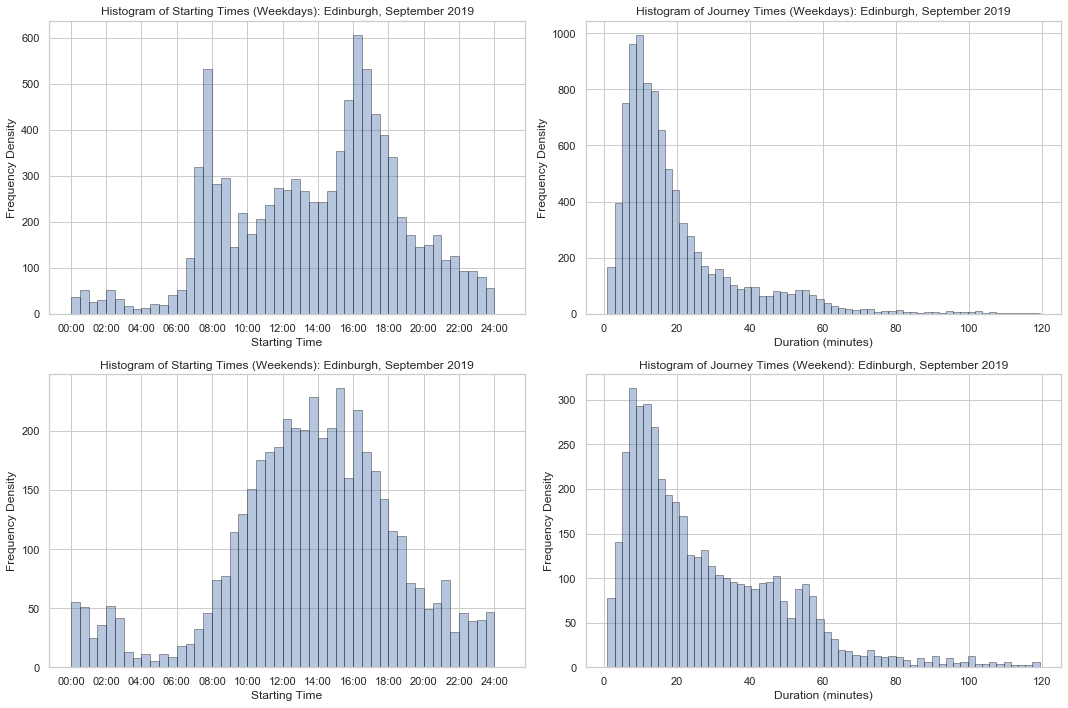

In [43]:
plt.rcParams["figure.figsize"] = (15,10)

# Start times: Weekdays
plt.subplot(2, 2, 1)
plt.rcParams["figure.figsize"] = (15,5)
sns.distplot((Edinburgh_September[(Edinburgh_September['started_at'].dt.weekday  <5)]['started_at'].dt.hour*60 + Edinburgh_September[(Edinburgh_September['started_at'].dt.weekday  <5)]['started_at'].dt.minute)/30, bins=np.arange(0,50), hist_kws=dict(ec="k"), kde=False)
plt.xticks(np.arange(0, 49, 4), ('00:00', '02:00', '04:00', '06:00', '08:00', '10:00', '12:00', '14:00', '16:00', '18:00', '20:00', '22:00', '24:00')) # Change x axis labels
plt.xlabel('Starting Time')
plt.ylabel('Frequency Density')
plt.title('Histogram of Starting Times (Weekdays): Edinburgh, September 2019')

# Journey duration: Weekdays
plt.subplot(2, 2, 2)
sns.distplot(Edinburgh_September[(Edinburgh_September['started_at'].dt.weekday  <5) & (Edinburgh_September['duration']<7200)]['duration']/60, bins=60, hist_kws=dict(ec="k"), kde=False)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency Density')
plt.title('Histogram of Journey Times (Weekdays): Edinburgh, September 2019')

# Start times: Weekends
plt.subplot(2, 2, 3)
sns.distplot((Edinburgh_September[(Edinburgh_September['started_at'].dt.weekday  >4)]['started_at'].dt.hour*60 + Edinburgh_September[(Edinburgh_September['started_at'].dt.weekday  >4)]['started_at'].dt.minute)/30, bins=np.arange(0,50), hist_kws=dict(ec="k"), kde=False)
plt.xticks(np.arange(0, 49, 4), ('00:00', '02:00', '04:00', '06:00', '08:00', '10:00', '12:00', '14:00', '16:00', '18:00', '20:00', '22:00', '24:00'))
plt.xlabel('Starting Time')
plt.ylabel('Frequency Density')
plt.title('Histogram of Starting Times (Weekends): Edinburgh, September 2019')

# Journey duration: Weekends
plt.subplot(2, 2, 4)
sns.distplot(Edinburgh_September[(Edinburgh_September['started_at'].dt.weekday  >4) & (Edinburgh_September['duration']<7201)]['duration']/60, bins=60, hist_kws=dict(ec="k"), kde=False)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency Density')
plt.title('Histogram of Journey Times (Weekend): Edinburgh, September 2019')

# Plot
plt.tight_layout()
plt.show()

#### Observations

**Starting times:** During the weekday we see two clear peaks in journey start times: once between 7am and 9am, and another between 3pm and 6:30pm. This agrees with what we saw beforehand - the bikes are being used to commute. Note that the second peak starting at 3pm would suggest the bikes are being used for school journeys, since the majority of working days would not be finished at this point. In contrast to this, at weekends we see a unimodal distribution, with traffic generally increasing until just after midday and then slowly decreasing thereafter. Note that at the weekends we see a comparatively higher proportion of people taking bikes out in the early hours of the morning (12am to 2am), which could be driven by fun, adventurous, drunk nights home.

**Journey duration:** We firstly notice that the distribution of journey durations is more similar across weekends and weekdays than for start times, suggesting that working patterns affect duration less than time of journey. However, there are still subtle differences, with weekend journeys generally taking longer and there being greater variation (perhaps because most most commute times by bike will not exceed half an hour). For both weekdays and weekends, the most common journey time is around the 10 minute mark, suggesting the bikes are being used mainly for quick journeys. We therefore suggest that new stations should be placed within an approximately 10 minute cycle from an existing station. 

Note also that for both weekends and weekdays we see a drop in frequency at the 60 minute mark. This makes sense - the scheme charges £1.50 for a single trip of up to 1 hour, with each 30 minutes thereafter being charged at £1 extra.

### 2.1.2  Rush Hour and Journey Duration: Comparison with London

To further understand the behaviours of bike users, we produce similar plots to the above using the data from all journeys taken in London during September 2018 to see how user patterns differ to those found in Edinburgh:

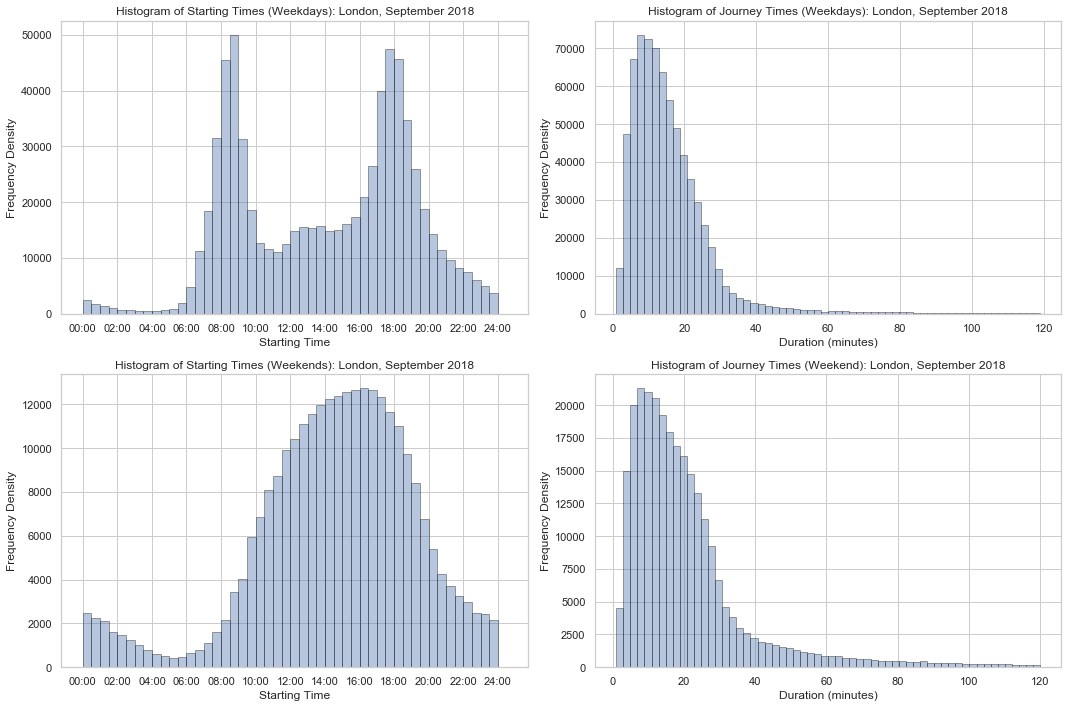

In [44]:
plt.rcParams["figure.figsize"] = (15,10)

# Start times: Weekdays
plt.subplot(2, 2, 1)
sns.distplot((London_September_18[(London_September_18['Start Date'].dt.weekday  <5)]['Start Date'].dt.hour*60 + London_September_18[(London_September_18['Start Date'].dt.weekday  <5)]['Start Date'].dt.minute)/30, bins=np.arange(0,50), hist_kws=dict(ec="k"), kde=False)
plt.xticks(np.arange(0, 49, 4), ('00:00', '02:00', '04:00', '06:00', '08:00', '10:00', '12:00', '14:00', '16:00', '18:00', '20:00', '22:00', '24:00'))
plt.xlabel('Starting Time')
plt.ylabel('Frequency Density')
plt.title('Histogram of Starting Times (Weekdays): London, September 2018')

# Journey duration: Weekdays
plt.subplot(2, 2, 2)
sns.distplot(London_September_18[(London_September_18['Start Date'].dt.weekday  <5) & (London_September_18['Duration']<7200)]['Duration']/60, bins=60, hist_kws=dict(ec="k"), kde=False)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency Density')
plt.title('Histogram of Journey Times (Weekdays): London, September 2018')

# Start times: Weekends
plt.subplot(2, 2, 3)
sns.distplot((London_September_18[(London_September_18['Start Date'].dt.weekday  >4)]['Start Date'].dt.hour*60 + London_September_18[(London_September_18['Start Date'].dt.weekday  >4)]['Start Date'].dt.minute)/30, bins=np.arange(0,50), hist_kws=dict(ec="k"), kde=False)
plt.xticks(np.arange(0, 49, 4), ('00:00', '02:00', '04:00', '06:00', '08:00', '10:00', '12:00', '14:00', '16:00', '18:00', '20:00', '22:00', '24:00'))
plt.xlabel('Starting Time')
plt.ylabel('Frequency Density')
plt.title('Histogram of Starting Times (Weekends): London, September 2018')

# Journey duration: Weekends
plt.subplot(2, 2, 4)
sns.distplot(London_September_18[(London_September_18['Start Date'].dt.weekday  >4) & (London_September_18['Duration']<7201)]['Duration']/60, bins=60, hist_kws=dict(ec="k"), kde=False)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency Density')
plt.title('Histogram of Journey Times (Weekend): London, September 2018')

# Plot
plt.tight_layout()
plt.show()

#### Observations

**Starting times:** The trend we see is reassuringly similar to that seen in Edinburgh - we see one peak during the morning and another during the early evening, corresponding to people travelling to and from work. However, the peaks are more pronounced with the London data, which may be because of the higher proportion of workers in the city compared with Edinburgh (which has a higher proportion of students). We also see that the second peak occurs slightly later than with Edinburgh, starting at around 4:30pm. Again, this is suggestive of a higher proportion of workers using the bikes, as this is a more reasonable time for the working day to end. Note also that we see reduced usage in the early hours of the morning than we do for Edinburgh - assuming that these bike journeys are related to late night social events, this suggests the London bike travel patterns are determined more by the working day than Edinburgh's.

During the weekends we also see a similar trend to Edinburgh, except it is more pronounced. This is likely due to the much larger number of people using the bikes, so anomalies have less influence on the overall trend. Note that London's peak weekend use tends to be slightly later than Edinburgh's, occuring at around 4/5pm.

**Journey duration:** As with Edinburgh, the most popular journey time appears to be around the 10 minute mark for both weekdays and weekends, suggesting that in both London and Edinburgh the bikes are mostly being used for short journeys. In contrast to Edinburgh, there are relatively fewer journeys lasting longer than 30 minutes. This difference is especially apparent during the weekends. As with Edinburgh, we can better understand this pattern when considering the pricing scheme used. London's cycle hire scheme is free only for the first 30 minutes and therefore we would expect the number of users exceeding this time to drop. 

### 2.2.1 Journey Distance in Edinburgh (September 2019) vs London (September 2018): Weekdays vs Weekends

Now we have investigated the differences in starting times and journey duration between London and Edinburgh, we decide to further distinguish between travel patterns in the two cities by comparing trends in journey *distance*. This is calculated as the *direct distance* between the start and end stations. Note that bikes being used for round trips will therefore have zero distance. Furthermore, journey distance calculated in this manner will always be smaller or equal to the actual distance travelled (as it is highly unlikely people will travel in straight lines - and this doesn't account for Edinburgh's hills!) This is a limitation of the analysis that we are unable to get around due to the lack of data.

The available list of stations (`London_Stations`) does not include *all* stations in the London journey dataset (`London_September_18`). This may be due to stations being added or removed between the compilation of these datasets. We therefore have to remove journeys which aren't listed in the station ID list.

In [45]:
# Remove the rows where we don't have the long/lat of both the start and end station
journeys_before = London_September_18.shape[0] # Number of journeys before we remove these stations
London_September_18 = London_September_18[London_September_18['StartStation Id'].isin(London_Stations['Station ID'])] # Remove if start station is not in the list
London_September_18 = London_September_18[London_September_18['EndStation Id'].isin(London_Stations['Station ID'])] # Remove if end station is not in the list
journeys_after = London_September_18.shape[0] # Number of journeys after we remove these stations

print("Proportion of journeys lost: "+str((journeys_before-journeys_after)*100/journeys_before)) # Journeys lost

Proportion of journeys lost: 3.6218091916117876


Note that this removes 36155 journeys from our dataset. However, this is only 3.62% of the total journeys and so we expect the loss to have limited impact (especially as we do not have reason to believe the occurence of missing data is related to the number or type of journeys taken to or from those stations).

Next, we merge the starting and ending coorindates into the `London_September_18` dataset:

In [46]:
# Ending locations
London_Stations = London_Stations.rename(columns = {"Station ID": "EndStation Id", "Latitude": "endlatitude", "Longitude": "endlongitude"})
London_September_18 = pd.merge(London_September_18, London_Stations, on = 'EndStation Id', how = 'outer')

# Starting locations
London_Stations = London_Stations.rename(columns = {"EndStation Id": "StartStation Id", "endlatitude": "startlatitude", "endlongitude": "startlongitude"})
London_September_18 = pd.merge(London_September_18, London_Stations, on = 'StartStation Id', how = 'outer')

# NaN rows for stations that didn't appear in the London dataset. Remove these:
London_September_18 = London_September_18.dropna()

Next, we define a function `distance` which calculates the direct distance (in km) between two coordinates. It takes as its agruments `long1`, `lat1`, `long2` and `lat2`, which correspond to the longitude and latitude of points 1 and 2 respectively. This function was adapted from a response given in this [Stack Overflow thread](https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude), which we have double checked using Google Maps.

In [47]:
def distance(long1,lat1,long2,lat2):
    
    '''
    Return the distance between [long1, lat1] and [long2, lat2] in km.
    '''
    
    # Radius of the Earth
    R = 6373.0
    
    # Turnes longitude/latitude from degrees into radians
    long1, lat1  = radians(long1), radians(lat1)
    long2, lat2  = radians(long2), radians(lat2)
    
    # Differences in radians
    dlong = long2 - long1
    dlat = lat2 - lat1
    
    # Calculation of distance from these
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlong / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    
    # Returns the distance in km
    return(distance)

We then add in the distances of each journey in the Edinburgh (September 2019) and London (September 2018) datasets:

In [48]:
London_September_18['distance'] = London_September_18.apply(lambda row: distance(row['startlongitude'],row['startlatitude'],row['endlongitude'],row['endlatitude']),axis=1)
Edinburgh_September['distance'] = Edinburgh_September.apply(lambda row: distance(row['start_station_longitude'],row['start_station_latitude'],row['end_station_longitude'],row['end_station_latitude']),axis=1)

Next, we plot histograms of journey distances for both London and Edinburgh, stratifying by weekend vs weekday journeys:

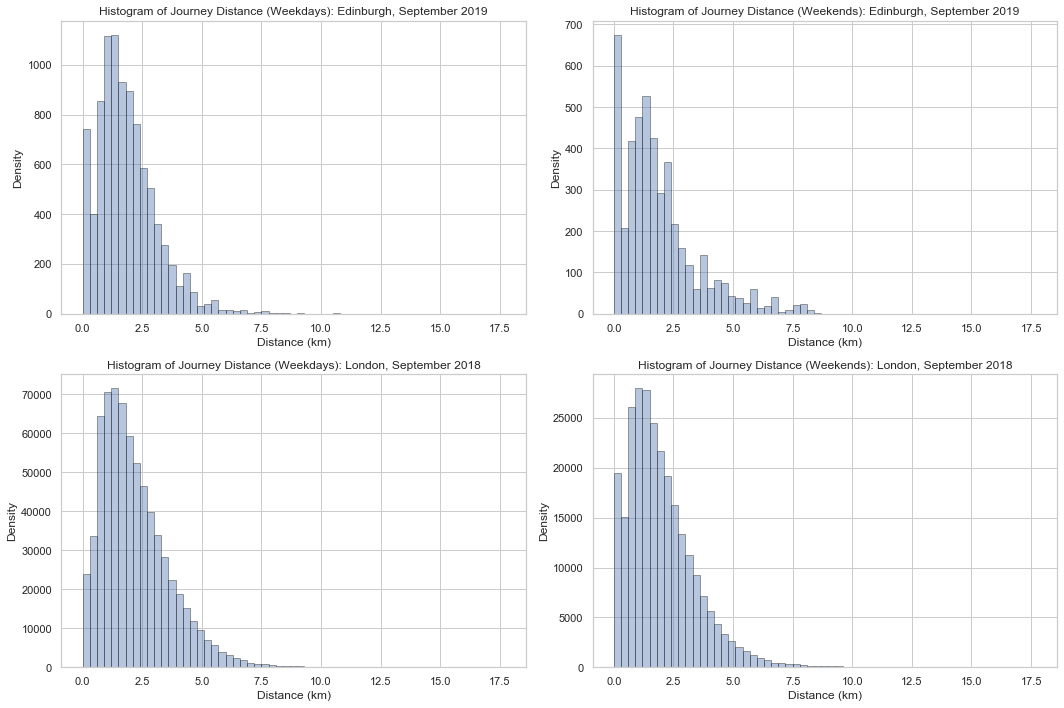

In [49]:
plt.rcParams["figure.figsize"] = (15,10)

# Journey distance: Edinburgh, Weekdays
plt.subplot(2, 2, 1)
sns.distplot(Edinburgh_September[(Edinburgh_September['started_at'].dt.weekday  <5)]['distance'], bins=np.arange(0,18,0.3), hist_kws=dict(ec="k"), kde=False)
plt.xlabel('Distance (km)')
plt.ylabel('Density')
plt.title('Histogram of Journey Distance (Weekdays): Edinburgh, September 2019')

# Journey distance: Edinburgh, Weekends
plt.subplot(2, 2, 2)
sns.distplot(Edinburgh_September[(Edinburgh_September['started_at'].dt.weekday  >4)]['distance'], bins=np.arange(0,18,0.3), hist_kws=dict(ec="k"), kde=False)
plt.xlabel('Distance (km)')
plt.ylabel('Density')
plt.title('Histogram of Journey Distance (Weekends): Edinburgh, September 2019')
            
# Journey distance: London, Weekdays            
plt.subplot(2, 2, 3)
sns.distplot(London_September_18[(London_September_18['Start Date'].dt.weekday  <5)]['distance'], bins=np.arange(0,18,0.3), hist_kws=dict(ec="k"), kde=False)
plt.xlabel('Distance (km)')
plt.ylabel('Density')
plt.title('Histogram of Journey Distance (Weekdays): London, September 2018')

# Journey distance: London, Weekends
plt.subplot(2, 2, 4)
sns.distplot(London_September_18[(London_September_18['Start Date'].dt.weekday  >4)]['distance'], bins=np.arange(0,18,0.3), hist_kws=dict(ec="k"), kde=False)
plt.xlabel('Distance (km)')
plt.ylabel('Density')
plt.title('Histogram of Journey Distance (Weekends): London, September 2018')
             
# Plot             
plt.tight_layout()
plt.show()

#### Observations

The general trend is very similar in all four graphs, suggesting that working patterns and the differences between Edinburgh and London have little influence on journey distances. However, note that the proportion of 'zero distance' journeys is higher for Edinburgh than it is for London. These correspond to round journeys, where people start and end at the same station. A reason for this might be because Edinburgh is a smaller city, and therefore you can see all the sights and return to the same station, whereas with London this would not be feasible.

For both cities, very few journeys exceeded 10km (even at weekends when journeys are more leisure-based). Customers not wanting to cycle more than 10km should be taken into account when planning for new stations in both Edinburgh and London. For example, a station placed at Edinburgh Zoo would not be used for people wanting to travel to Portobello - the distance these locations is approximately 12 km and so it is unlikely this would route would be used as much as might be expected.


### 2.3.1 Average Speed in Edinburgh (September 2019) vs London (September 2018): Weekdays vs Weekends

After looking into both journey distance and time, we now look at the speed by using the formula *speed = distance/time*:

In [50]:
London_September_18['speed'] = London_September_18['distance']/(London_September_18['Duration']/3600)
Edinburgh_September['speed'] = Edinburgh_September['distance']/(Edinburgh_September['duration']/3600)

We then plot the average speed by journey start time. To do this we use the `groupby` function. We also remove all zero-length journeys as these will unfairly skew the results.

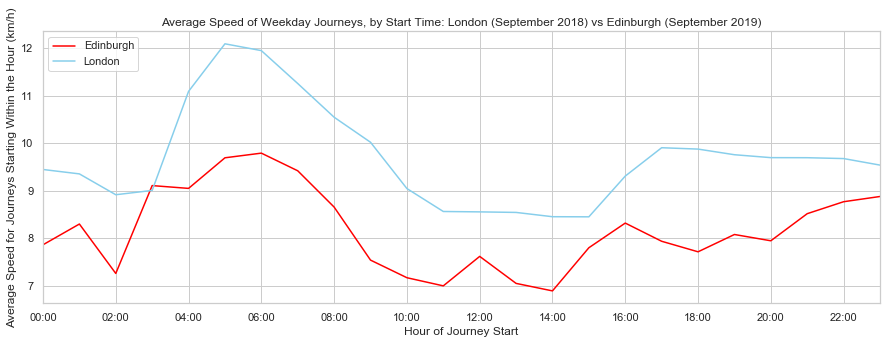

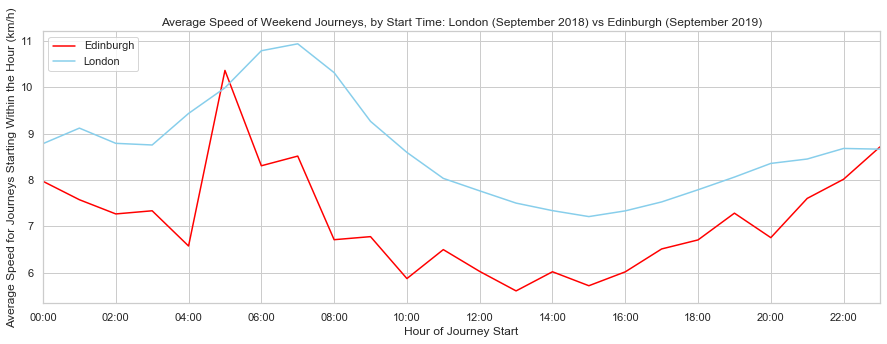

In [51]:
plt.rcParams["figure.figsize"] = (15,10)

# Take out round trips - journeys with zero distance
Edinburgh_September_Speed = Edinburgh_September[(Edinburgh_September['distance'] > 0)]
London_September_18_Speed = London_September_18[(London_September_18['distance'] > 0)]

# Adding start hour variable for both datasets to group speed by
Edinburgh_September_Speed['starthour'] = Edinburgh_September_Speed['started_at'].dt.hour
London_September_18_Speed['starthour'] = London_September_18_Speed['Start Date'].dt.hour

# Average speed on weekdays
Edinburgh_Average_Speed_Weekday = Edinburgh_September_Speed[(Edinburgh_September_Speed['started_at'].dt.weekday  <5)].groupby(['starthour']).mean()['speed']
Edinburgh_Average_Speed_Weekday.plot(figsize = (15, 5), color = 'red', linestyle='-', label='Edinburgh')
London_Average_Speed_Weekday = London_September_18_Speed[(London_September_18_Speed['Start Date'].dt.weekday <5)].groupby(['starthour']).mean()['speed']
London_Average_Speed_Weekday.plot(figsize = (15, 5), color = 'skyblue', linestyle='-', label='London')

plt.legend(loc='upper left')
plt.xlabel('Hour of Journey Start')
plt.ylabel('Average Speed for Journeys Starting Within the Hour (km/h)')
plt.title('Average Speed of Weekday Journeys, by Start Time: London (September 2018) vs Edinburgh (September 2019)')
plt.xticks(np.arange(0, 24, 2), ('00:00', '02:00', '04:00', '06:00', '08:00', '10:00', '12:00', '14:00', '16:00', '18:00', '20:00', '22:00', '24:00'))
plt.show()

# Average speed on weekends
Edinburgh_Average_Speed_Weekend = Edinburgh_September_Speed[(Edinburgh_September_Speed['started_at'].dt.weekday  >4)].groupby(['starthour']).mean()['speed']
Edinburgh_Average_Speed_Weekend.plot(figsize = (15, 5), color = 'red', linestyle='-', label='Edinburgh')
London_Average_Speed_Weekend = London_September_18_Speed[(London_September_18_Speed['Start Date'].dt.weekday >4)].groupby(['starthour']).mean()['speed']
London_Average_Speed_Weekend.plot(figsize = (15, 5), color = 'skyblue', linestyle='-', label='London')

# Set plotting parameters
plt.legend(loc='upper left')
plt.xlabel('Hour of Journey Start')
plt.ylabel('Average Speed for Journeys Starting Within the Hour (km/h)')
plt.title('Average Speed of Weekend Journeys, by Start Time: London (September 2018) vs Edinburgh (September 2019)')
plt.xticks(np.arange(0, 24, 2), ('00:00', '02:00', '04:00', '06:00', '08:00', '10:00', '12:00', '14:00', '16:00', '18:00', '20:00', '22:00', '24:00'))

# Plot
plt.show()

#### Observations

In both graphs we see a peak in average speed for journeys starting at approximately 5-6 am, and the slowest journeys are taken around midday/early afternoon. Less traffic on the roads coupled with customers likely to have a pre-determined place to be (e.g. work), could be the reason for this. This also makes sense when we consider the time of day with the slowest speed - journeys taken in the early afternoon are more likely to be leisure-based where there is little urgency to be somewhere by a certain time, and by this time the amount of motorists will have considerably increased.

Further, Edinburgh bike users appear to be consistently slower than London's. There could be multiple reasons for this. Firstly, Edinburgh is generally a harder city to cycle in - it's an older city with cobbled streets and many hills. Secondly, Edinburgh is typically a calmer city than London, so perhaps this makes its commuters and tourists take a more relaxed approach.

Finally, we see a greater variation in Edinburgh's speed than London's, however this is most likely due to the smaller amount of data rather than an actual trend.


## 3. Trends in Scheme Uptake

We next want to compare how quickly both schemes have evolved. This is to show how much growth could expected in Edinburgh in the future. 

We start by plotting the total number of journeys per month in Edinburgh since the scheme started. 

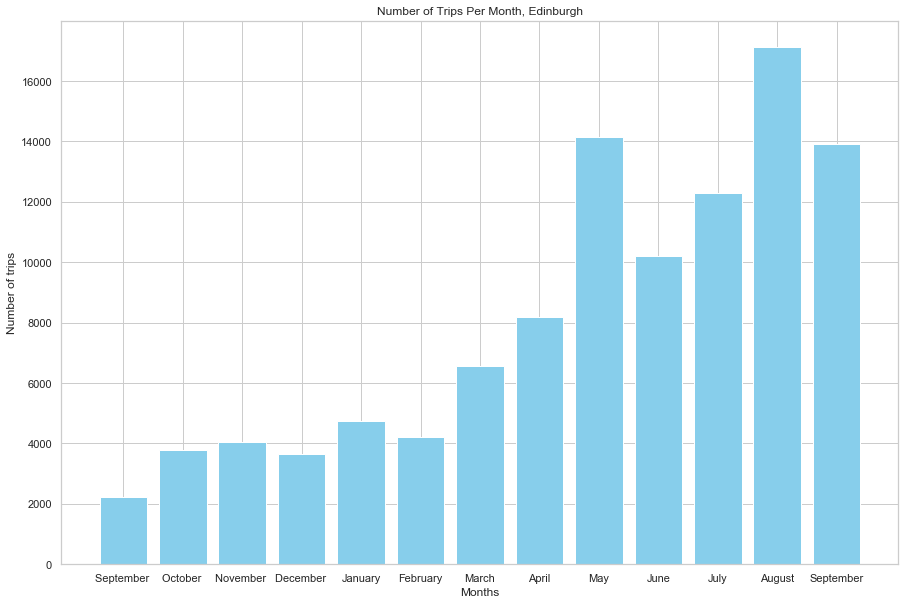

In [52]:
plt.rcParams["figure.figsize"] = (15,10)
months = ["September ", "October ", "November ", "December ", "January", "February", "March", "April", "May", "June", "July", "August", "September"]
frequency = [Edinburgh_September_18.shape[0], Edinburgh_October_18.shape[0], Edinburgh_November_18.shape[0], Edinburgh_December_18.shape[0], Edinburgh_January.shape[0], Edinburgh_February.shape[0], Edinburgh_March.shape[0], Edinburgh_April.shape[0], Edinburgh_May.shape[0], Edinburgh_June.shape[0], Edinburgh_July.shape[0], Edinburgh_August.shape[0], Edinburgh_September.shape[0]]
plt.bar(months, frequency, color = "skyblue")
plt.xlabel("Months")
plt.ylabel("Number of trips")
plt.title("Number of Trips Per Month, Edinburgh")
plt.show()


Next we produce index charts for both London and Edinburgh, adding a 20 timestep moving average (red line). As the number of journeys was particularly low for the first day (only 3 journeys in total for Edinburgh), we use an average over the first two weeks for the index calculations.

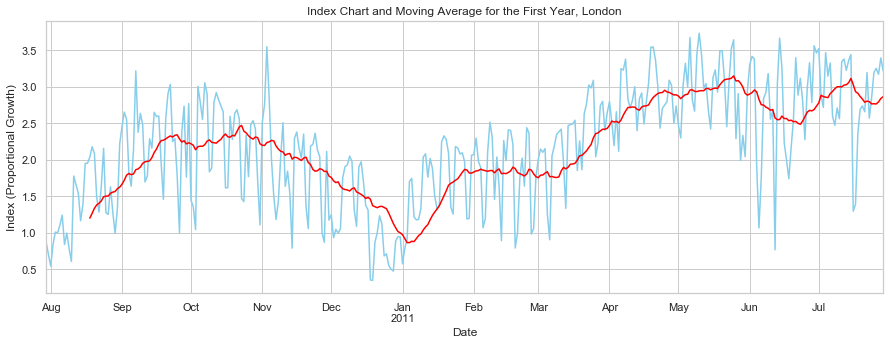

In [53]:
plt.rcParams["figure.figsize"] = (15,10)

# Calculate index
London_all_data.index = pd.to_datetime(London_all_data['Day'], dayfirst = True)
London_all_data['ratio'] = London_all_data["Number of Bicycle Hires"]/(London_all_data["Number of Bicycle Hires"][0:14].mean())
London_all_data['ratiosmooth'] = London_all_data.rolling(20)['ratio'].mean()

# Plot and set plotting parameters
London_all_data['ratio'][0:365].plot(figsize = (15, 5), color = 'skyblue', label='London')
London_all_data['ratiosmooth'][0:365].plot(figsize = (15, 5), color = 'red', label='London')
plt.title('Index Chart and Moving Average for the First Year, London')
plt.xlabel('Date')
plt.ylabel('Index (Proportional Growth)')
plt.show()

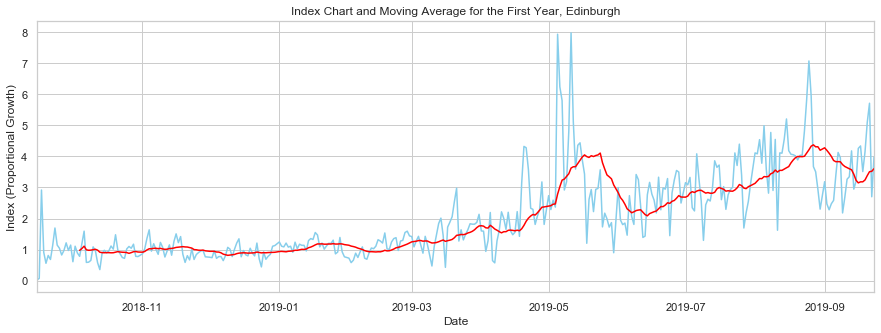

In [54]:
plt.rcParams["figure.figsize"] = (15,10)


# Extract day of travel
Edinburgh_BikeRides['day'] = Edinburgh_BikeRides['started_at'].dt.date 
# Count number of journeys per day
Edinburgh_BikeRides['countperday'] = Edinburgh_BikeRides.groupby('day')['day'].transform('count')
# Take first row for each date, and only keep counts per day
Edinburgh_BikeRides_CountsPerDay = Edinburgh_BikeRides
Edinburgh_BikeRides_CountsPerDay = Edinburgh_BikeRides_CountsPerDay.groupby('day').first()
# Calculate index and moving average
Edinburgh_BikeRides_CountsPerDay['ratio'] = Edinburgh_BikeRides_CountsPerDay["countperday"]/(Edinburgh_BikeRides_CountsPerDay["countperday"][0:14].mean()) # Use average in first two weeks to index
Edinburgh_BikeRides_CountsPerDay['ratiosmooth'] = Edinburgh_BikeRides_CountsPerDay.rolling(20)['ratio'].mean()


#Plot and set plotting parameters
Edinburgh_BikeRides_CountsPerDay['ratio'][0:365].plot(figsize = (15, 5), color = 'skyblue', label='London')
Edinburgh_BikeRides_CountsPerDay['ratiosmooth'][0:365].plot(figsize = (15, 5), color = 'red', label='London')
plt.title('Index Chart and Moving Average for the First Year, Edinburgh')
plt.xlabel('Date')
plt.ylabel('Index (Proportional Growth)')
plt.show()

#### Observations

For both Edinburgh and London we see the biggest increase in number of journeys during the summer months - this makes sense as people will be more inclined to cycle if the weather is nice. Initially we see a faster uptake with the London data, however this may be because the scheme started in a summer month (whereas Edinburgh's scheme started in September). Indeed, after this initial increase we see the number of journeys dip as winter approaches.

After one year we see a similar growth across London and Edinburgh, with the number of journeys per day being approximately triple the amount when the schemes were first started. This suggests that, despite the differences in traveller patterns and city demographics, the growth of Edinburgh's scheme could be predicted using exising data from London.

## Overall Conclusions

- When considering potential locations of new bike stations in Edinburgh, these should be put in coastal areas or within the city centre, no more than approximately a 10 minute cycle of existing stations. Bike scheme users are highly unlikely to travel more than 10 km on the bikes, and this should also be considered.
- During Monday-Friday, patterns in bike usage are driven by working schedules in both London and Edinburgh, suggesting a large proportion of bike users are commuters.
- Cyclists in Edinburgh travel slower than cyclists in London, and take more round trips. This may be a result of Edinburgh being a smaller, less busy city.
- For both cities, cyclists travel the fastest during the early hours of the morning when there is less road traffic.
- In both London and Edinburgh, the number of journeys taken per day approximately tripled 1 year after the schemes started. This, along with other similar patterns seen between London and Edinburgh cyclists suggests that in the future, the London data may be used to predict trends in Edinburgh's cycle scheme and this is something we would have liked to explore further if we had the time.
